# H<sub>2</sub>/N<sub>2</sub> EIS and file pre-processing for use with OSIF Software
Linn Kelley<br>
08/26/2022

This script prepares different file types for use with OSIF software.

H<sub>2</sub>/N<sub>2</sub> EIS is used to calculate proton transport resistance in the CCL. This is determined by fitting the impedance data with a transmission line equivalent circuit. A transmission line consists of parallel conductors that transmit electrical waves. There is capacitance between the conductors because this is true of any pair of conductors separated by a dielectric (air in the case of transmission lines). AC current in the transmission lines generates a magnetic field, and the electric flux of that field creates inductance along the wires. Inductance is proportional to the ratio of electric flux ($\phi$) and applied current ($I$):
<center>
$L=\frac{\phi}{I}$
</center>
A transmission line consists of repeating units of inductance and resistance on both parallel lines, with capacitance bridging the lines between units. 

<img src="EIS guide.png" width="600">

<center>
    
*Figure 1. Impedance response of a fuel cell with a blocked cathode. The circuit component governing the shape of each region is highlighted*
    
</center>

The porous CCL creates the transmission line impedance response in a fuel cell as is shown in Figure 1. The depth of a pore can be considered as the length of the transmission line. For a pore, the parallel conductors of the transmission line are the electrolyte (proton conducting) phase and the carbon (electron conducting phase). Because carbon is highly conductive, the resistance in this phase is ignored. Ionic resistance in the electrolyte is the only impedance included along parallel conductors of the transmission line. The capacitance between the conductors is double layer capacitance. There is not a repeating inductance in the fuel cell model because the conductors are not wires. However, an overall cell inductance forms between the anode and cathode of the fuel cell due to electric flux between the polarized plates. Wires connected to the cell also contribute to the overall inductance. High frequency resistances are present as a single lumped resistance, not a repeating unit.

During an EIS measurement, the anode is held at 0 V vs SHE, and HOR occurs. The cathode is held at a potential too high for HER to occur (usually 0.2-0.4 V vs SHE). Because N2 flows to the cathode instead of air, no ORR occurs. A small amount of H2 crossover from anode to cathode causes some HOR at the cathode and HER at the anode; however, there is essentially no reaction occurring at the cathode. As the electrochemical potential of the electrons in the cathode oscillates with applied alternating voltage, protons transport to and from the electrode surface as the double layer adjusts to the charge of the electrode. Resistance due to proton transport appears at high-medium frequencies as a 45<sup>o</sup> line seen in orange in Figure 1. Diffusion-limited or transport-limited processes are often modeled as Warburg elements which have a constant phase angle and 45<sup>o</sup> impedance response. Slopes varying from 45<sup>o</sup> are attributed to inhomogeneous ion transport properties through the CCL (typical of thicker electrodes). At lower frequencies the double layer has time to fully charge before the electrode charge changes. For this reason, proton transport resistance no longer dominates the impedance response which becomes purely capacitive. A typical impedance response would show charge transfer resistance at low frequencies because this resistance is in parallel with double layer capacitance. Because there is no charge transfer resistance in parallel with Cdl, Cdl is a break in the circuit which can’t be bypassed at low frequencies. There is minimal charge resistance associated with H2 crossover and HOR. This small resistance contributes to non-ideality of the capacitive response at low frequencies. Deviation from a vertical line is also attributed to inhomogeneous distribution of pore radii in the electrode where pore depth is inconsistent and impedance response varies between pores. Deviations become more pronounced at lower relative humidity because there is less uniform contact between catalyst pores and ionomer/water, which produces further inhomogeneities in double layer structure and ion transport properties.

OSIF is an EIS data fitting software. There is a tutorial about EIS and OSIF in the Training-Tutorials section of Teams. 

### Import libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dta2df import dta

### Import files

In [18]:
df_txt = pd.read_csv('Sample text file.txt',delimiter='\t',index_col=False)
df_dta = dta('Sample dta file.DTA',98)

### osifprep and osifprep_dta inputs
df: dataframe<br> 
path: path to folder where the new file will be saved<br> 
hf & lf: high and low frequency, the function trims the data to this frequency range, these limits can be used to remove noise<br> 
name: name of the new file <br> 

### osifprep and osifprep_dta returns
a file ready for use with OSIF software

In [32]:
def osifprep(df,path,hf,lf,name):

    cut = df[(df['Zfreq']<hf) & (df['Zfreq']>lf)]
    dfc = cut[['Zfreq','Zreal','Zimag']].copy()
    dfc.reset_index(inplace=True)
    del dfc['index']
    dfc['Z (\u03A9)']=np.sqrt(np.add(np.square(dfc['Zreal']),np.square(dfc['Zimag'])))
    dfc = dfc.rename(columns={'Zfreq':'Frequency (Hz)','Zreal':'Z\' (\u03A9)','Zimag':'Z\'\' (\u03A9)'})
    plt.plot(cut['Zreal'],-cut['Zimag'])
    plt.xlabel('Z$_{real}$ m$\u03A9$cm$^2$')
    plt.ylabel('-Z$_{im}$ m$\u03A9$cm$^2$')
    dfc.to_csv(path+name+'.txt', sep='\t',header=True)
    
def osifprep_dta(df,path,hf,lf,name):
    
    cut = df[(df['Freq']<hf) & (df['Freq']>lf)]
    dfc = cut[['Freq','Zreal','Zimag']].copy()
    dfc.reset_index(inplace=True)
    del dfc['index']
    dfc['Z (\u03A9)']=np.sqrt(np.add(np.square(dfc['Zreal']),np.square(dfc['Zimag'])))
    dfc = dfc.rename(columns={'Freq':'Frequency (Hz)','Zreal':'Z\' (\u03A9)','Zimag':'Z\'\' (\u03A9)'})
    plt.plot(cut['Zreal'],-cut['Zimag'])
    plt.xlabel('Z$_{real}$ m$\u03A9$cm$^2$')
    plt.ylabel('-Z$_{im}$ m$\u03A9$cm$^2$')
    dfc.to_csv(name+'.txt', sep='\t',header=True)

### Example use

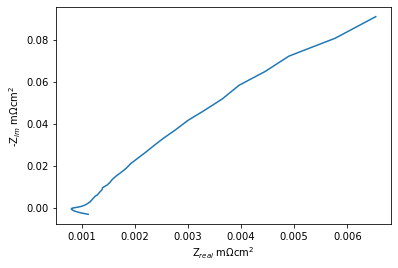

In [33]:
osifprep(df_txt,'saved images/',20000,1,'txt test')

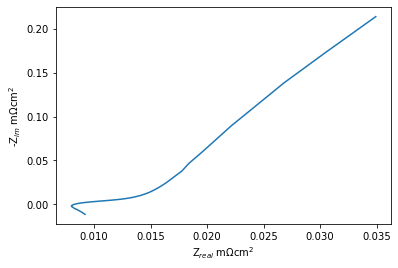

In [34]:
osifprep_dta(df_dta,'saved images/',60000,3,'dta test')

Happy fitting!